In [1]:
# Execute esses comandos para a instalação das bibliotecas
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn

# Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

**Pandas:**

O pandas é uma biblioteca em Python usada para manipulação e análise de dados. O principal recurso é o DataFrame, uma tabela bidimensional para trabalhar com dados de forma eficiente. O pandas também oferece o Series, uma estrutura unidimensional, e recursos para lidar com dados ausentes e estatística descritiva. Ele pode lidar com grandes conjuntos de dados e é integrado com outras bibliotecas populares de ciência de dados em Python. O pandas simplifica a manipulação e análise de dados, sendo amplamente utilizado por cientistas de dados e analistas.  (**McKinney**, 2008)

**Matplotlib:**

O Matplotlib é uma biblioteca em Python para visualização de dados. Ele permite criar gráficos estáticos e interativos, desde gráficos simples até complexos. Com ampla personalização, é possível ajustar cores, estilos, títulos e legendas. A integração com outras bibliotecas, como NumPy e pandas, facilita a análise de dados. O Matplotlib suporta diversos formatos de saída e ajuda na comunicação eficaz dos resultados. O estudo do Matplotlib junto com o pandas permite lidar de forma simplificada com dados ausentes, melhorando a precisão e confiabilidade das análises. A combinação dessas bibliotecas oferece uma análise completa e embasada, comunicando os resultados de forma impactante. (**John D. Hunter**, 2007).

**Seaborn:**

Seaborn é uma biblioteca de visualização de dados em Python baseada no Matplotlib. Ela fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos.
(**Michael Waskom**, 2017).

**Sklearn.linear_model:**

A biblioteca scikit-learn (sklearn) é uma biblioteca de aprendizado de máquina em Python que oferece uma ampla gama de funcionalidades para modelagem estatística e análise de dados. O submódulo sklearn.linear_model fornece implementações eficientes e flexíveis de modelos de regressão linear, incluindo regressão linear simples, regressão linear múltipla, regressão Ridge, regressão Lasso e regressão ElasticNet. 
(**Vanderplas, J.**, 2011)


In [2]:
# Ler Base de Dados
df = pd.read_csv('Arquivos/Bovespa.csv', sep=',', low_memory=False)

In [3]:
# Preview da tabela
df.head()

,TypeReg,Date,BDICode,Codneg,MarketType,Company,Spec,Prazot,Currency,Open,Max,Min,Med,Close,Preofc,Preofv,Totneg,Quatot
0,1,20010102,2,ACES3,10,ACESITA,ON *,,R$,0.85,0.90,0.85,0.86,0.86,0.86,0.87,24,49500000
1,1,20010102,96,ACES3F,20,ACESITA,ON *,,R$,0.89,0.89,0.88,0.88,0.88,0.81,0.90,2,40633
2,1,20010102,2,ACES4,10,ACESITA,PN *,,R$,1.01,1.08,1.01,1.05,1.06,1.05,1.06,294,2715100000
3,1,20010102,96,ACES4F,20,ACESITA,PN *,,R$,1.04,1.05,1.04,1.04,1.04,1.04,1.06,6,114394
4,1,20010102,2,ALBA3,10,ALBARUS,ON,,R$,1.10,1.10,1.10,1.10,1.10,1.07,1.15,2,11000


In [4]:
# Exibir informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6571472 entries, 0 to 6571471
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   TypeReg     int64  
 1   Date        int64  
 2   BDICode     int64  
 3   Codneg      object 
 4   MarketType  int64  
 5   Company     object 
 6   Spec        object 
 7   Prazot      object 
 8   Currency    object 
 9   Open        float64
 10  Max         float64
 11  Min         float64
 12  Med         float64
 13  Close       float64
 14  Preofc      float64
 15  Preofv      float64
 16  Totneg      int64  
 17  Quatot      int64  
dtypes: float64(7), int64(6), object(5)
memory usage: 902.5+ MB


In [5]:
# Convertendo a coluna Date para Data
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

In [6]:
# Definindo o periodo de 1 ano
df = df[(df['Date'] >= '2019-03-18') & (df['Date'] <= '2020-03-18')]

In [7]:
# Renomeando as colunas
df.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_ativo",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_fechamento",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
]


**CALCULANDO A MÉDIA DE TODOS OS PREÇOS**

O gráfico de barras mostra a média dos preços para cada coluna selecionada. Cada barra representa uma coluna e a altura da barra indica a média dos valores daquela coluna. No caso deste gráfico, todas as barras estão acima de 100, o que significa que a média dos preços nessas colunas é maior do que 100. Isso pode indicar que os preços tendem a ser relativamente altos nesses aspectos do mercado financeiro.






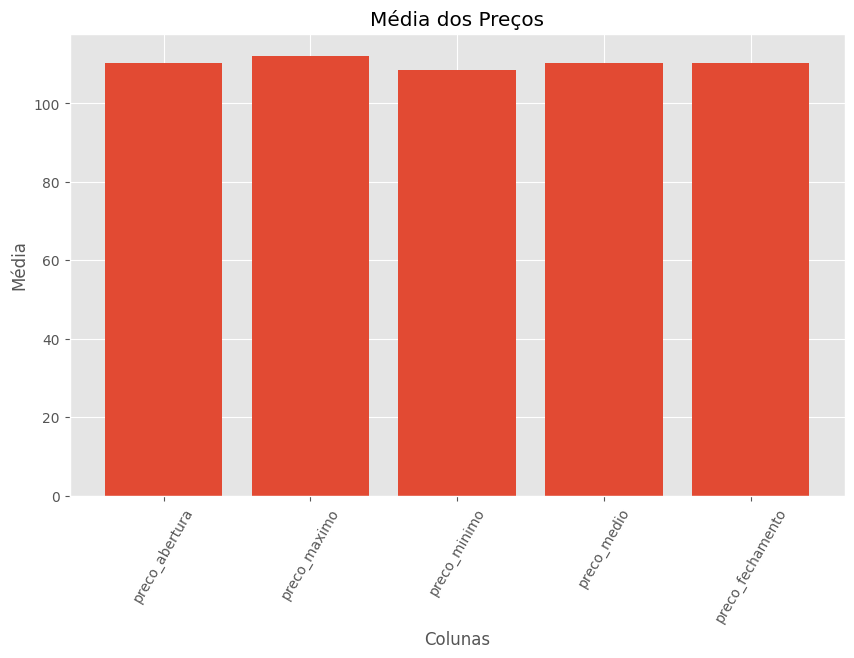

In [8]:
# Selecionando as colunas desejadas
colunas = [
    "preco_abertura",
    "preco_maximo",
    "preco_minimo",
    "preco_medio",
    "preco_fechamento",
]

# Calculando a media usando a função .mean
medias = df[colunas].mean()

plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
plt.bar(colunas, medias)
plt.xlabel('Colunas')
plt.ylabel('Média')
plt.title('Média dos Preços')
plt.xticks(rotation=60)
plt.show()

**CALCULANDO A MODA DE TODOS OS PREÇOS**

O gráfico de barras mostra a moda dos preços para cada coluna selecionada. Cada barra representa uma coluna e a altura da barra indica a moda dos valores daquela coluna. No caso deste gráfico, a moda está acima de 0.008 em todas as colunas. Isso significa que o valor mais frequente nessas colunas é maior que 0.008.

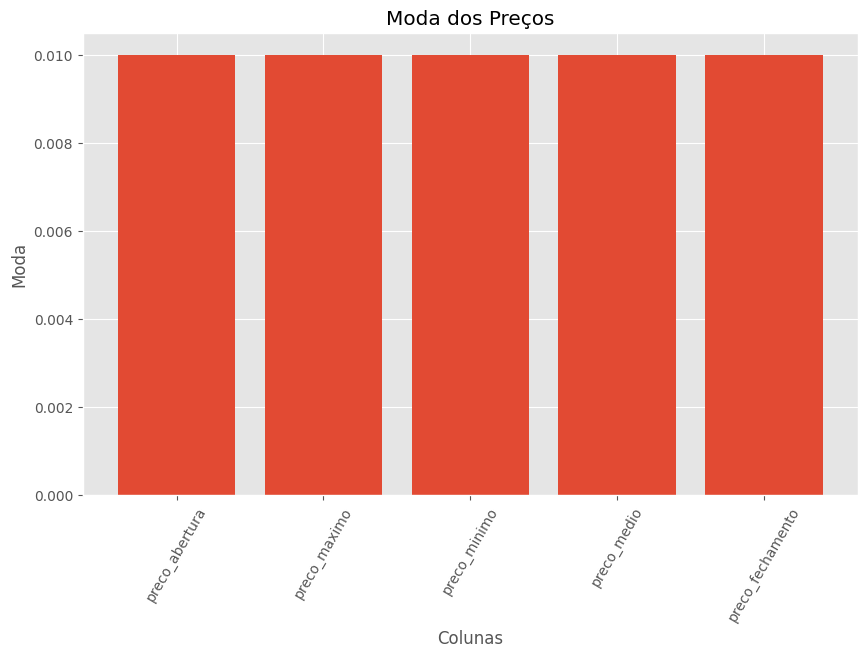

In [9]:
# Calculando a moda usando a função .mode
modas = df[colunas].mode().values[0]

plt.figure(figsize=(10, 6))

plt.bar(colunas, modas)
plt.xlabel('Colunas')
plt.ylabel('Moda')
plt.title('Moda dos Preços')
plt.xticks(rotation=60)
plt.show()


**CALCULANDO O DESVIO PADRÃO DOS PREÇOS**

O gráfico de linhas mostra o desvio padrão das colunas selecionadas. Cada ponto no gráfico representa uma coluna e o valor no eixo y indica o desvio padrão dos valores daquela coluna. O desvio padrão é uma medida de dispersão que indica o quanto os valores estão afastados da média. Neste caso, podemos observar a variação do desvio padrão entre as colunas ao longo do tempo. A rotação dos rótulos no eixo x facilita a leitura dos nomes das colunas.

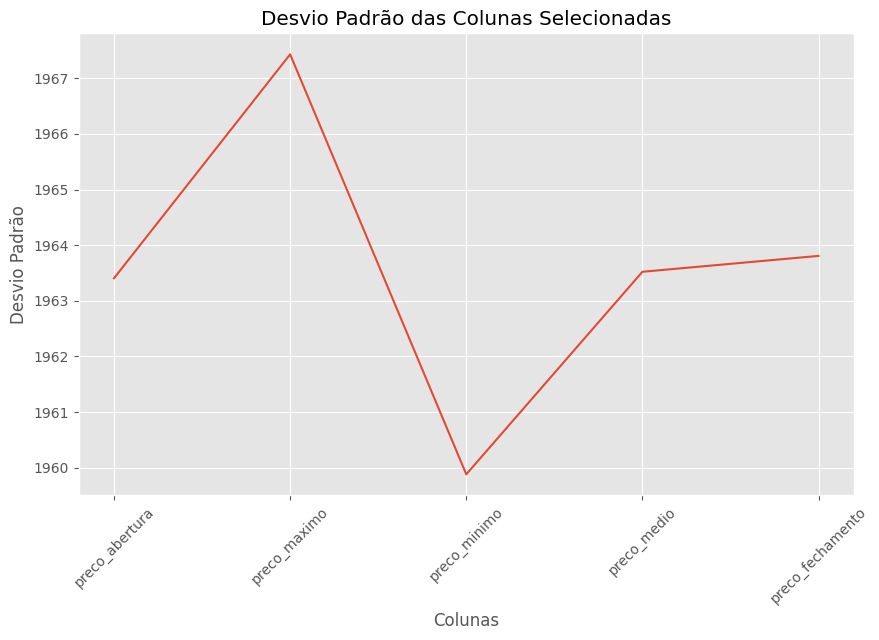

In [10]:
# Selecionar as colunas desejadas
colunas = ["preco_abertura", "preco_maximo", "preco_minimo", "preco_medio", "preco_fechamento"]

# Calcular o desvio padrão para cada coluna selecionada
desvios_padrao = df[colunas].std()

# Plotar o gráfico de linhas do desvio padrão
plt.figure(figsize=(10, 6))
plt.plot(desvios_padrao.index, desvios_padrao)
plt.xlabel('Colunas')
plt.ylabel('Desvio Padrão')
plt.title('Desvio Padrão das Colunas Selecionadas')
plt.xticks(rotation=45)
plt.show()


**VARIAÇÃO DO PREÇO DE FECHAMENTO DOS ATIVOS POR MÊS E ANO**

O gráfico de linhas mostra a variação do preço de fechamento dos ativos selecionados no perido de 2019 a 2020. Podemos observar que, no início do ano, os ativos apresentaram um desempenho relativamente estável, com destaque para a MGLU3 com um alta no mês de Julho, porém, a partir do mês de agosto, houve uma queda brusca nos preços. Tambem no mês de Março de 2020 tem outra queda no preço que coincide com o início da pandemia de COVID-19, que teve um impacto significativo nos mercados financeiros em todo o mundo.

Entre os ativos selecionados, é possível notar que o ativo MGLU3 teve um bom desempenho no meio do ano de 2019, com um aumento progressivo no preço de fechamento. No entanto, a partir de Março de 2020, assim como os demais ativos, ele também sofreu uma queda acentuada devido aos impactos da pandemia.

Portanto, o gráfico evidencia a influência da COVID-19 nos preços dos ativos em 2020, com uma queda generalizada no mercado financeiro. O ativo MGLU3, apesar de ter apresentado um desempenho positivo no início do ano de 2019, não escapou das consequências negativas da pandemia e também experimentou uma significativa diminuição em seu preço ao longo dos meses seguintes.

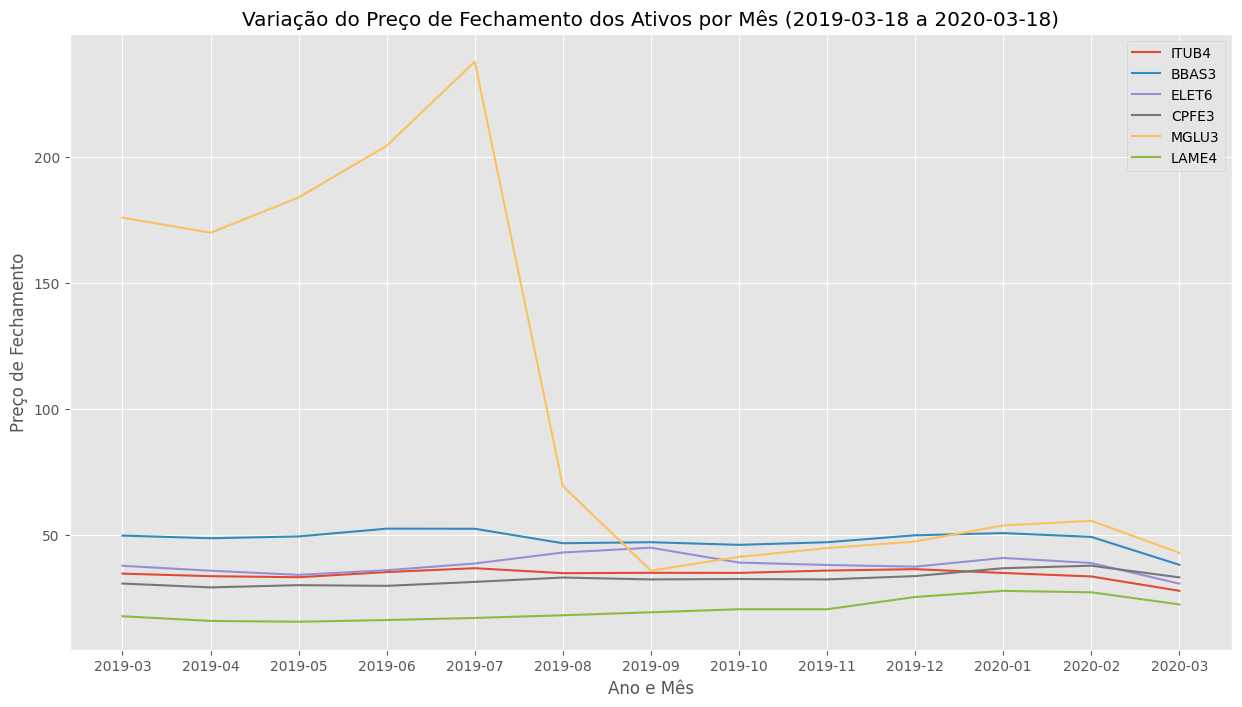

In [11]:
# Converter a coluna "data_pregao" para o tipo de dados datetime
df['data_pregao'] = pd.to_datetime(df['data_pregao'])

# Criar uma nova coluna com o ano correspondente a cada data
df['ano'] = df['data_pregao'].dt.year
df['mes'] = df['data_pregao'].dt.month

# Selecionar os ativos desejados e o período de '2019-03-18' a '2020-03-18'
ativos = ['ITUB4', 'BBAS3', 'ELET6', 'CPFE3', 'MGLU3', 'LAME4']
inicio_periodo = pd.to_datetime('2019-03-18')
fim_periodo = pd.to_datetime('2020-03-18')
df_periodo = df[(df['cod_ativo'].isin(ativos)) & (df['data_pregao'] >= inicio_periodo) & (df['data_pregao'] <= fim_periodo)]

# Agrupar os dados por ano, mês e ativo, calculando a média do preço de fechamento
df_agrupado = df_periodo.groupby(['ano', 'mes', 'cod_ativo'])['preco_fechamento'].mean().reset_index()

# Criar o gráfico de linhas mostrando a variação do preço dos ativos por mês no período
plt.figure(figsize=(15, 8))

for ativo in ativos:
    dados_ativo = df_agrupado[df_agrupado['cod_ativo'] == ativo]
    labels = [f"{ano}-{mes:02d}" for ano, mes in zip(dados_ativo['ano'], dados_ativo['mes'])]  # Formatar rótulos do eixo x
    plt.plot(labels, dados_ativo['preco_fechamento'], label=ativo)

plt.style.use('ggplot')
plt.xlabel('Ano e Mês')
plt.ylabel('Preço de Fechamento')
plt.title(f'Variação do Preço de Fechamento dos Ativos por Mês ({inicio_periodo.strftime("%Y-%m-%d")} a {fim_periodo.strftime("%Y-%m-%d")})')
plt.legend()
plt.show()


**CALCULANDO O RETORNO DOS ATIVOS DOS BANCOS ITAÚ E BANCO DO BRASIL**

Foi realizado um estudo comparativo entre os retornos percentuais diários de dois ativos do mesmo setor bancário: ITUB4 (Itaú Unibanco Holding SA) e BBAS3 (Banco do Brasil SA).

Após o pré-processamento dos dados, que incluiu a conversão da coluna "preco_fechamento" para o tipo numérico e o cálculo dos retornos percentuais diários para cada ativo, o DataFrame foi filtrado para incluir somente os dados desses dois ativos.

Em seguida, foi criado um gráfico de linhas para visualizar a variação dos retornos percentuais ao longo do tempo. No eixo x, foram apresentadas as datas de pregão, e no eixo y, os retornos percentuais. As linhas correspondentes a cada ativo (ITUB4 e BBAS3) foram plotadas no mesmo gráfico, permitindo a comparação entre eles.

O estudo comparativo dos retornos percentuais desses dois ativos do setor bancário é útil para analisar o desempenho relativo entre eles ao longo do tempo. Isso pode fornecer insights sobre a performance dos ativos e auxiliar na tomada de decisões de investimento.

No entanto, é importante considerar que o cálculo de retornos percentuais pode ser afetado por fatores como ajustes de dividendos e eventos corporativos. Portanto, é recomendado realizar uma análise mais aprofundada e considerar outros indicadores e informações relevantes antes de tomar qualquer decisão de investimento.

C:\Users\Lucka\AppData\Local\Temp\ipykernel_8228\916243371.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retorno['retorno'] = df_retorno.groupby('cod_ativo')['preco_fechamento'].pct_change()


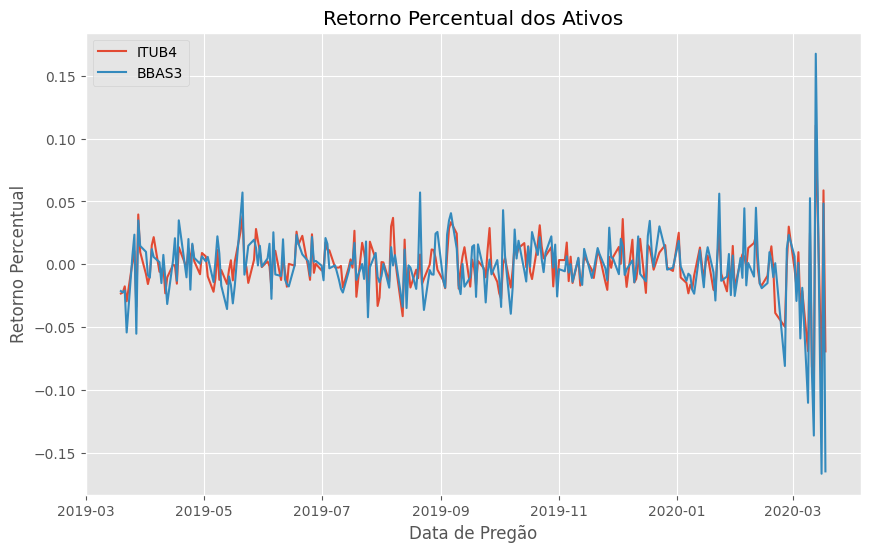

In [12]:
# Mostrando o retorno dos ativos
df['preco_fechamento'] = pd.to_numeric(df['preco_fechamento'])

df['retorno'] = df.groupby('cod_ativo')['preco_fechamento'].pct_change()

# Fitrando dois ativos do mesmo setor, dois bancos.
ativos = ['ITUB4','BBAS3']
df_retorno = df[df['cod_ativo'].isin(ativos)]

# Calcule os retornos percentuais para cada ativo selecionado
df_retorno['retorno'] = df_retorno.groupby('cod_ativo')['preco_fechamento'].pct_change()

plt.figure(figsize=(10, 6))

for ativo in ativos:
    dados_ativo = df_retorno[df_retorno['cod_ativo'] == ativo]
    plt.plot(dados_ativo['data_pregao'], dados_ativo['retorno'], label=ativo)

plt.xlabel('Data de Pregão')
plt.ylabel('Retorno Percentual')
plt.title('Retorno Percentual dos Ativos')
plt.legend()

# Exibir o gráfico
plt.show()

**MOSTRANDO O RETORNO PERCENTUAL DE 6 ATIVOS DE 3 ÁREAS DIFERENTES**

Foram selecionados ativos de três setores diferentes, com dois ativos de cada setor. Os setores representados são:

Setor Bancário: ITUB4 (Itaú) e BBAS3 (Banco do Brasil)
Setor Energético: ELET6 (Eletrobras) e CPFE3 (CPFL Energia)
Setor Varejista: MGLU3 (Magazine Luiza) e LAME4 (Lojas Americanas)
Esses ativos foram filtrados a partir do DataFrame original, que continha dados de vários ativos e setores diferentes.

Em seguida, foi realizado o cálculo dos retornos percentuais diários para cada um dos ativos selecionados. Isso permite analisar a variação percentual diária dos preços de fechamento de cada ativo ao longo do tempo.

O gráfico de linhas foi construído para exibir esses retornos percentuais diários. Cada linha representa um ativo, identificado pelo rótulo no formato do código do ativo. Assim, é possível comparar a variação percentual diária entre os diferentes ativos e setores.

Essa análise dos retornos percentuais permite identificar tendências, padrões e volatilidade dos ativos em cada setor. É uma ferramenta útil para compreender o desempenho relativo dos ativos em diferentes setores e auxiliar na tomada de decisões de investimento informadas.

No entanto, vale ressaltar que a análise de retornos passados não garante retornos futuros, e é recomendado considerar outras informações e indicadores na avaliação dos ativos e dos setores em questão.

No código fornecido, destacamos os ativos MGLU3 (Magazine Luiza) e LAME4 (Lojas Americanas), que fazem parte do setor varejista. Esses ativos apresentaram oscilações significativas nos retornos percentuais durante o período de análise em março de 2020.

Durante esse período específico, é possível observar que os retornos percentuais desses ativos apresentaram volatilidade e oscilações notáveis. Essa volatilidade pode estar relacionada a eventos ou notícias específicas que afetaram o setor varejista ou a essas empresas em particular.

A análise dos retornos percentuais permite identificar essas variações e avaliar a volatilidade e o desempenho relativo dos ativos em diferentes momentos. No caso dos ativos MGLU3 e LAME4, a observação das oscilações em março de 2020 pode ser um ponto de interesse para uma análise mais aprofundada das razões por trás dessas variações.

É importante ressaltar que a análise de retornos passados não garante retornos futuros, e outros fatores, como análise fundamentalista, análise de mercado e notícias relevantes, devem ser considerados na tomada de decisões de investimento.

C:\Users\Lucka\AppData\Local\Temp\ipykernel_8228\2068640048.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retorno['retorno'] = df_retorno.groupby('cod_ativo')['preco_fechamento'].pct_change()


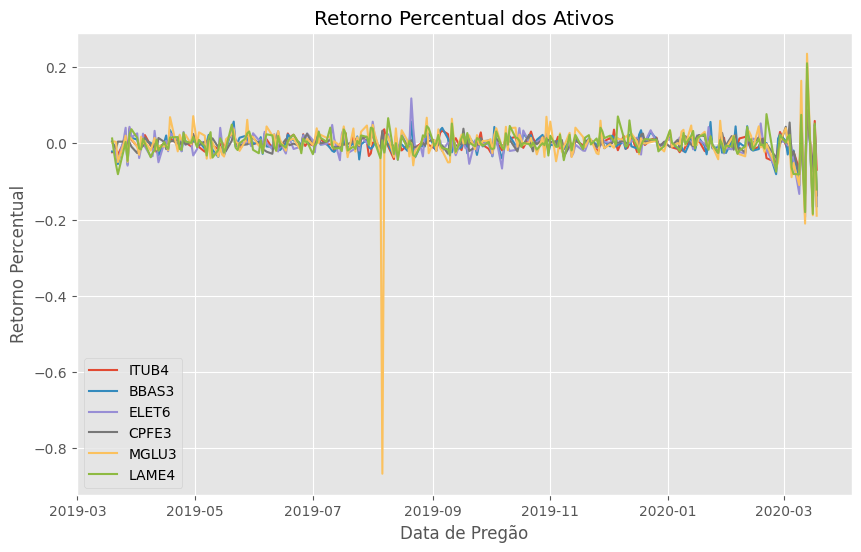

In [13]:
# Mostrando o retorno dos ativos
df['preco_fechamento'] = pd.to_numeric(df['preco_fechamento'])

df['retorno'] = df.groupby('cod_ativo')['preco_fechamento'].pct_change()

# Fitrando ativos
ativos = ['ITUB4', 'BBAS3', 'ELET6', 'CPFE3', 'MGLU3','LAME4']

df_retorno = df[df['cod_ativo'].isin(ativos)]

plt.figure(figsize=(10, 6))

# Calcula os retornos percentuais para cada ativo selecionado
df_retorno['retorno'] = df_retorno.groupby('cod_ativo')['preco_fechamento'].pct_change()

for ativo in ativos:
    dados_ativo = df_retorno[df_retorno['cod_ativo'] == ativo]
    plt.plot(dados_ativo['data_pregao'], dados_ativo['retorno'], label=ativo)

plt.xlabel('Data de Pregão')
plt.ylabel('Retorno Percentual')
plt.title('Retorno Percentual dos Ativos')
plt.legend()

# Exibir o gráfico
plt.show()


**MOSTRANDO A VARIÂNCIA DOS ATIVOS**

analisando a variância dos retornos dos ativos selecionados. Os ativos considerados são: ITUB4, BBAS3, ELET6, CPFE3, MGLU3 e LAME4.

Primeiramente, convertemos a coluna 'preco_fechamento' em dados numéricos para realizar cálculos. Em seguida, calculamos os retornos percentuais diários para cada ativo, agrupando-os pelo código do ativo.

Em seguida, filtramos o DataFrame original para incluir apenas os ativos selecionados. Com base nesses dados, calculamos a variância dos retornos para cada ativo usando a função var() do pandas.

Para visualizar as variações, criamos um gráfico de linhas. No eixo x do gráfico, temos os códigos dos ativos, enquanto no eixo y, temos a variância dos retornos. Cada ponto no gráfico representa um ativo, e a linha que conecta esses pontos nos permite comparar as variações entre os ativos selecionados.

Esse gráfico nos ajuda a identificar quais ativos apresentam maior ou menor variação em seus retornos. A variância é uma medida de volatilidade, e ativos com maior variância tendem a ter retornos mais voláteis e imprevisíveis.

C:\Users\Lucka\AppData\Local\Temp\ipykernel_8228\92649988.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retorno['retorno'] = df_retorno.groupby('cod_ativo')['preco_fechamento'].pct_change()


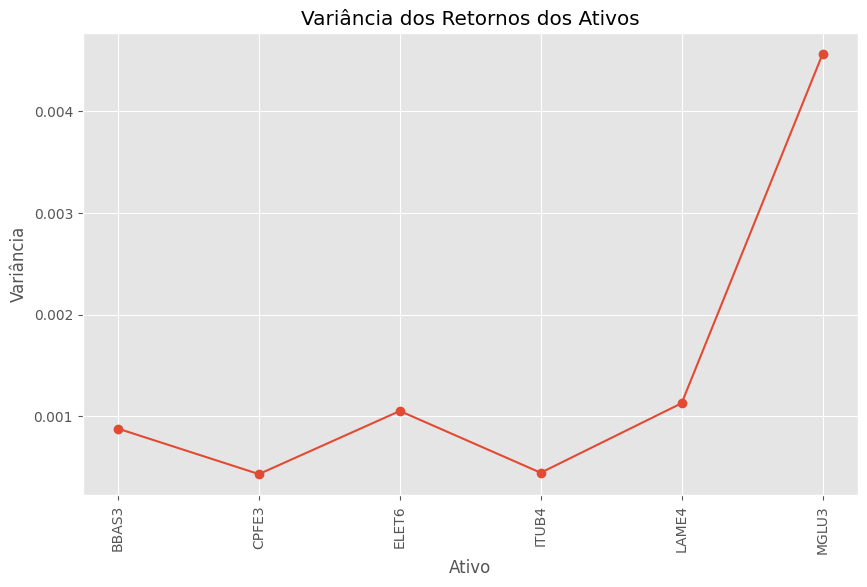

In [14]:
df['preco_fechamento'] = pd.to_numeric(df['preco_fechamento'])

df['retorno'] = df.groupby('cod_ativo')['preco_fechamento'].pct_change()

# Fitrando ativos
ativos = ['ITUB4', 'BBAS3', 'ELET6', 'CPFE3', 'MGLU3','LAME4']
df_retorno = df[df['cod_ativo'].isin(ativos)]

# Calcule os retornos percentuais para cada ativo selecionado
df_retorno['retorno'] = df_retorno.groupby('cod_ativo')['preco_fechamento'].pct_change()

variancia = df_retorno.groupby('cod_ativo')['retorno'].var()

# Criar o gráfico de linhas da variância
plt.figure(figsize=(10, 6))
plt.plot(variancia.index, variancia.values, marker='o', linestyle='-')
plt.xlabel('Ativo')
plt.ylabel('Variância')
plt.title('Variância dos Retornos dos Ativos')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

**ANÁLISE DOS ATIVOS PARA TOMADA DE DECISÃO, POR ATIVO COM MENOR VOLATILIDADE**

Cálculo dos retornos percentuais diários para cada ativo selecionado, utilizando a função 'pct_change()'. Isso permite analisar as variações diárias nos preços de fechamento de cada ativo.

Filtragem dos ativos de interesse, com base em uma lista pré-definida. Neste caso, os ativos selecionados são ITUB4, BBAS3, ELET6, CPFE3, MGLU3 e LAME4.

Cálculo da volatilidade dos retornos percentuais diários para cada ativo, utilizando a função 'std()'. A volatilidade é medida pelo desvio padrão dos retornos, e é um indicador da variação dos preços do ativo ao longo do tempo.

Identificação do ativo com menor volatilidade, ou seja, menor desvio padrão dos retornos. Esse ativo é aquele que apresenta uma variação menos pronunciada nos preços de fechamento em relação aos demais.

In [15]:
df['preco_fechamento'] = pd.to_numeric(df['preco_fechamento'])

df['retorno'] = df.groupby('cod_ativo')['preco_fechamento'].pct_change()

# Fitrando ativos
ativos = ['ITUB4', 'BBAS3', 'ELET6', 'CPFE3', 'MGLU3','LAME4']
df_retorno = df[df['cod_ativo'].isin(ativos)]
desvio_padrao = df_retorno.groupby('cod_ativo')['retorno'].std()

# Encontrar o ativo com menor volatilidade (menor desvio padrão)
ativo_menor_volatilidade = desvio_padrao.idxmin()

print(f"Ativo com menor volatilidade: {ativo_menor_volatilidade}")

Ativo com menor volatilidade: CPFE3


**ANÁLISE DOS ATIVOS PARA MOSTRAR O ATIVO COM O RETORNO MAIS IMEDIATO**

Remoção das linhas que possuem valores nulos na coluna 'retorno' utilizando a função 'dropna()'. Isso garante que apenas os dados válidos sejam considerados para o cálculo.

Cálculo do retorno médio para cada ativo, agrupando os dados pelo código do ativo ('cod_ativo') e calculando a média dos retornos utilizando a função 'mean()'.

Identificação do ativo com o maior retorno imediato, ou seja, o ativo que apresenta a maior média de retorno entre os ativos analisados. Isso é feito encontrando o índice do ativo com o maior valor médio utilizando a função 'idxmax()'.

Impressão na tela do ativo com o maior retorno imediato.

Esse código permite identificar o ativo que, em média, apresenta o maior retorno entre os ativos considerados, o que pode ser útil para tomar decisões de investimento com base na performance histórica dos ativos.

In [16]:
df_retorno = df.dropna(subset=['retorno'])

# Calcular o retorno médio para cada ativo
retorno_medio = df_retorno.groupby('cod_ativo')['retorno'].mean()

# Encontrar o ativo com maior retorno imediato
ativo_com_maior_retorno = retorno_medio.idxmax()

# Imprimir o ativo com maior retorno imediato
print(f'O ativo com maior retorno imediato é: {ativo_com_maior_retorno}')


O ativo com maior retorno imediato é: IBOVR65


**ANÁLISE DE CORRELAÇÕES**

Cálculo da matriz de correlações utilizando a função corr() do DataFrame df_analise. Essa matriz mostra as relações de correlação entre todas as combinações possíveis de pares de variáveis.

Geração de um mapa de calor das correlações utilizando a função heatmap() da biblioteca seaborn (importada como sns). Esse mapa de calor é uma representação visual das correlações, onde cores mais quentes indicam correlações positivas e cores mais frias indicam correlações negativas.

Exibição do mapa de calor das correlações utilizando a função show() do matplotlib.pyplot.

Esse código permite identificar e visualizar as relações de correlação entre as variáveis selecionadas, fornecendo insights sobre a dependência entre elas. Isso pode ser útil para entender como as variáveis se relacionam entre si e identificar possíveis padrões ou influências mútuas.

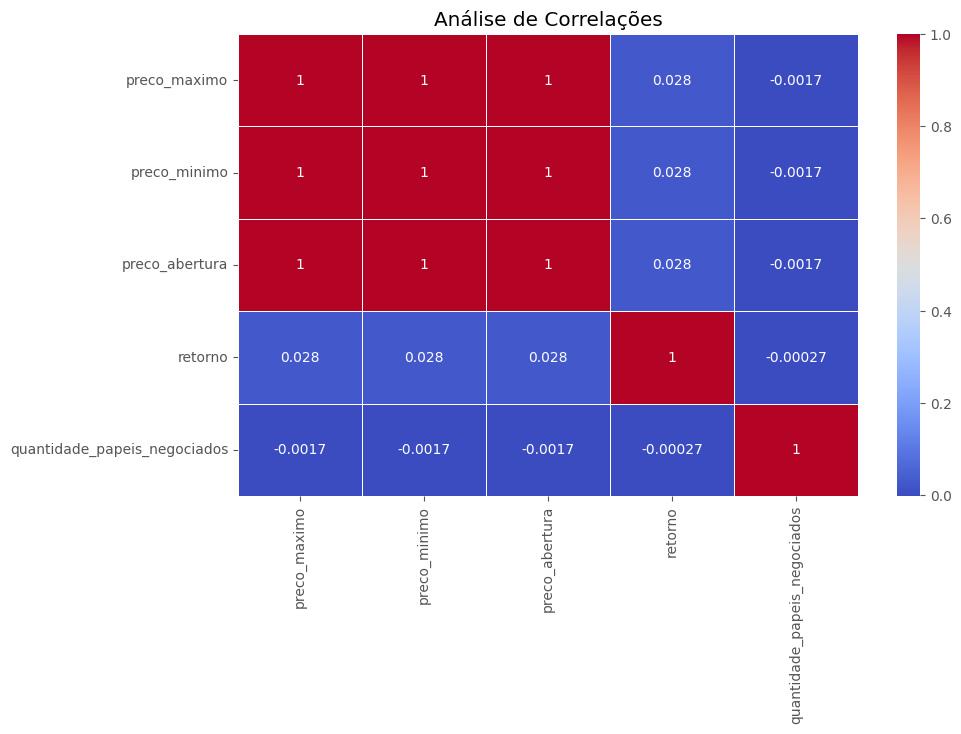

In [17]:
colunas = [
    "preco_maximo",
    "preco_minimo",
    "preco_abertura",
    "retorno",
    "quantidade_papeis_negociados"
]

df_analise = df[colunas]

# Calcular a matriz de correlações
correlacoes = df_analise.corr()

# Gerar o mapa de calor das correlações
plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Análise de Correlações")
plt.show()


**ESTUDO DE REGRESSÃO LINEAR SOBRE O PREÇO DE FECHAMENTO DOS ATIVOS PELO PREÇO MÁXIMO**

No gráfico apresentado, observamos que a maioria dos pontos azuis está próxima ou alinhada com a linha de regressão. Isso ocorre porque a regressão linear busca encontrar a melhor relação linear entre as variáveis, de forma a minimizar os erros de estimativa. Quando os pontos estão próximos à linha de regressão, indica que o modelo linear é capaz de explicar e prever, em grande parte, os valores observados.

No entanto, é importante ressaltar que nem todos os pontos estarão exatamente na linha de regressão, pois sempre haverá algum grau de variação ou erro nas estimativas. Alguns pontos podem estar mais afastados da linha, indicando que essas observações possuem valores discrepantes ou podem ser influenciadas por outros fatores não considerados no modelo.

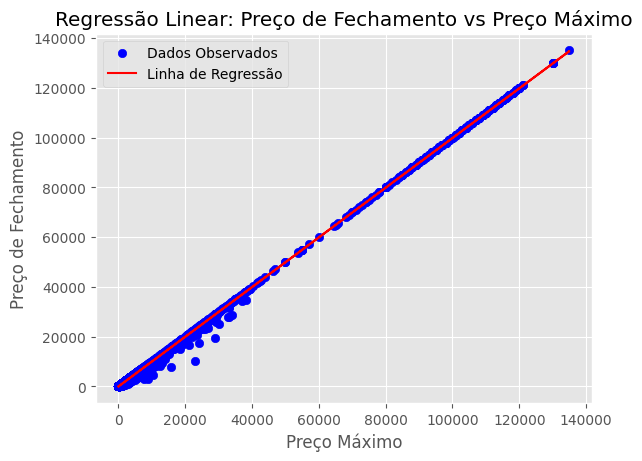

In [18]:
# Selecionando as colunas relevantes
df_estudo1 = df[["preco_fechamento", "preco_maximo"]].copy()

# Removendo linhas com valores nulos
df_estudo1.dropna(inplace=True)

# Separando as variáveis independentes e dependentes
X = df_estudo1["preco_maximo"].values.reshape(-1, 1)
y = df_estudo1["preco_fechamento"].values

# Criando o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X, y)

# Realizando a previsão
y_pred = regressor.predict(X)

# Plotando o gráfico
plt.scatter(X, y, color='blue', label='Dados Observados')
plt.plot(X, y_pred, color='red', label='Linha de Regressão')
plt.xlabel('Preço Máximo')
plt.ylabel('Preço de Fechamento')
plt.title('Regressão Linear: Preço de Fechamento vs Preço Máximo')
plt.legend()
plt.show()


**ESTUDO DE REGRESSÃO LINEAR SOBRE O PREÇO DE FECHAMENTO DOS ATIVOS PELA QUANTIDADE DE PAPEIS**

Neste código, estamos realizando uma regressão linear entre duas variáveis: "preço de fechamento" e "quantidade de papéis negociados".

Primeiramente, selecionamos as colunas relevantes do DataFrame original para criar um novo DataFrame chamado "df_estudo2", contendo apenas as colunas "preço de fechamento" e "quantidade de papéis negociados".

Em seguida, removemos as linhas que possuem valores nulos nesse novo DataFrame, garantindo que tenhamos apenas dados completos para realizar a análise.

Após isso, separamos as variáveis independentes e dependentes. A variável independente "X" corresponde à "quantidade de papéis negociados" e é redimensionada para um array bidimensional utilizando a função "reshape". A variável dependente "y" corresponde ao "preço de fechamento".

Criamos o modelo de regressão linear utilizando a classe "LinearRegression" e ajustamos o modelo aos dados de treinamento utilizando o método "fit", passando as variáveis independentes "X" e dependentes "y".

Realizamos a previsão dos valores de "y" utilizando o método "predict" do modelo de regressão linear, com base nos valores de "X".

Por fim, plotamos o gráfico de dispersão dos dados observados, onde os pontos azuis representam a relação entre a "quantidade de papéis negociados" (eixo x) e o "preço de fechamento" (eixo y). Traçamos a linha de regressão (linha vermelha) que representa a relação linear estimada entre as variáveis. Neste caso, a linha é reta no eixo 0 porque temos apenas uma variável independente.

Através dessa análise visual, podemos observar a tendência geral da relação entre as variáveis e avaliar a adequação do modelo de regressão linear para explicar essa relação.

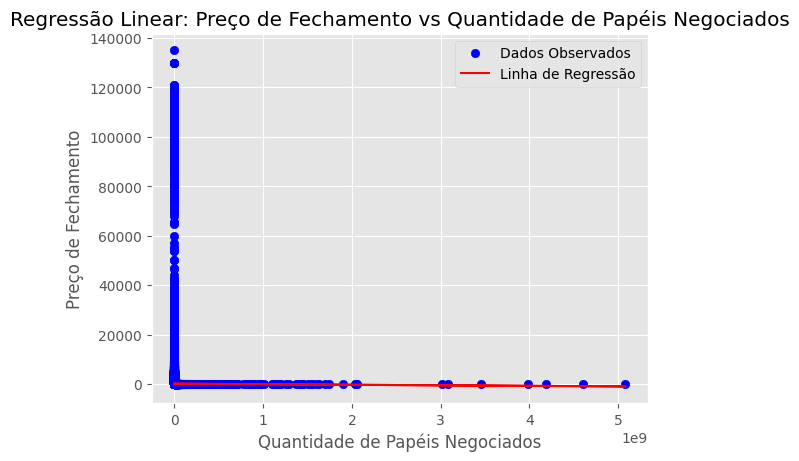

In [19]:
# Selecionando as colunas relevantes
df_estudo2 = df[["preco_fechamento", "quantidade_papeis_negociados"]].copy()

# Removendo linhas com valores nulos
df_estudo2.dropna(inplace=True)

# Separando as variáveis independentes e dependentes
X = df_estudo2["quantidade_papeis_negociados"].values.reshape(-1, 1)
y = df_estudo2["preco_fechamento"].values

# Criando o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(X, y)

# Realizando a previsão
y_pred = regressor.predict(X)

# Plotando o gráfico
plt.scatter(X, y, color='blue', label='Dados Observados')
plt.plot(X, y_pred, color='red', label='Linha de Regressão')
plt.xlabel('Quantidade de Papéis Negociados')
plt.ylabel('Preço de Fechamento')
plt.title('Regressão Linear: Preço de Fechamento vs Quantidade de Papéis Negociados')
plt.legend()
plt.show()


In [20]:
#Salvando arquivo tratado
#df.to_excel('Arquivos/Bovespa_v2.xlsx', index=False)